In [1]:
import os.path 
import pandas as pd
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1.Lectura del archivo.

En este caso vamos a usar un excel creado por mí con todos los resultados de los Juegos Olímpicos y Mundiales para la prueba del Decathlon, la cual consiste en 10 pruebas independientes de las cuales obtenemos una puntuación en función del resultado obtenido en las mismas.
Esta Base de Datos no es tan grande como otras lo que nos permite que funcione de forma rápida en equipos con menos potencia como el mío, pero nos permite realizar todas las tareas explicadas durante este curso.

In [2]:
path = './data.xlsx'  
norm_path = os.path.normpath(path) 
ddbb = pd.read_excel(norm_path)

### 2.Normalización de los datos.
Gran parte de esta normalización de los datos se realizó durante la creación del excel en otro documento, principalmente borrar los atletas que que no habían completado todas las pruebas.

En este caso lo necesario para terminar la normalización para nuestro proyecto borramos los datos que están como NaN-> Not a number y principalmente para la columna de los paises borrar los espacios que se generaron de forma involuntaria al comienzo o al final del mismo.

También se elimina la columna 1500m NF la cual la usé como columna auxiliar para pasar a segundos el tiempo obtenido en la prueba de 1500 metros lisos.

Por último cambio de nombre a las columnas para que sea más entendible a la hora de trabajar con esos datos y creo un par de dataframe que servirán para más adelante no tener que borrar y añadir columnas.

In [3]:
ddbb.dropna()
ddbb.columns = ddbb.columns.str.strip()
del ddbb['1500m NF']

ddbb.columns = ['Position', 'Athlete', 'Age', 'Country', 'Total Points', 'Year', 'Competition', '100m', 
                 '100m Points', 'Lj', 'Lj Points', 'Sp', 'Sp Points', 'Hj', 'Hj Points', '400m', '400m Points', 
                 '110m H', '110m H Points', 'Dt', 'Dt Points', 'Pv', 'Pv Points', 'Jt', 'Jt Points', 
                 '1500m Points', '1500m']

ddbbData = ddbb[['100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points','400m Points','400m',
                 '110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

ddbbPairPlot = ddbb[['Position','Age','100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points',
                     '400m Points','400m','110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points',
                     '1500m Points','1500m']]

### 3.Pairplot
Antes de comenzar el proceso vamos a ver la relación que tienen las diferentes variables entre sí y poder comenzar a estudiar diferentes datos que nos puedan resultar útiles para entender este problema, en nuestro realizamos uno en función de la posición final en las competiciones

In [4]:
positionDDBB = []

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10):
        positionDDBB.append(10)
    elif(ddbb.iloc[i]['Position'] > 10 and ddbb.iloc[i]['Position'] <= 25):
        positionDDBB.append(25)
    elif(ddbb.iloc[i]['Position'] > 25):
        positionDDBB.append(30)

ageDDBB = []

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Age'] <= 23):
        ageDDBB.append(23)
    elif(ddbb.iloc[i]['Age'] > 23 and ddbb.iloc[i]['Age'] <= 28):
        ageDDBB.append(28)
    elif(ddbb.iloc[i]['Age'] > 28):
        ageDDBB.append(30)

In [5]:
ddbbPairPlot['Position']  = positionDDBB    
sns.pairplot(ddbbPairPlot, hue='Position',height=5)

Teniendo en cuenta los resultados obtenidos en el pairplot anterior vamos a estudiar diferentes apartados que nos puedan aportar información sobre este deporte.

Mediante el paiplot podemos obtener ciertos patrones que se den entre diferentes variables

### 4.Mejores puntuaciones de la década

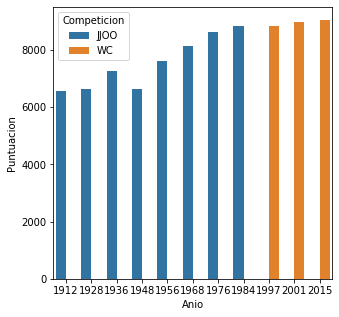

In [6]:
puntuacion = [0,0,0,0,0,0,0,0,0,0,0]
atleta = [0,0,0,0,0,0,0,0,0,0,0]
anio = [0,0,0,0,0,0,0,0,0,0,0]
competicion = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Year'] < 1920 and ddbb.iloc[i]['Total Points'] > puntuacion[0]):
        puntuacion[0] = ddbb.iloc[i]['Total Points']
        atleta[0] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1920 and ddbb.iloc[i]['Year'] < 1930 and ddbb.iloc[i]['Total Points'] > puntuacion[1]):
        puntuacion[1] = ddbb.iloc[i]['Total Points']
        atleta[1] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1930 and ddbb.iloc[i]['Year'] < 1940 and ddbb.iloc[i]['Total Points'] > puntuacion[2]):
        puntuacion[2] = ddbb.iloc[i]['Total Points']
        atleta[2] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1940 and ddbb.iloc[i]['Year'] < 1950 and ddbb.iloc[i]['Total Points'] > puntuacion[3]):
        puntuacion[3] = ddbb.iloc[i]['Total Points']
        atleta[3] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1950 and ddbb.iloc[i]['Year'] < 1960 and ddbb.iloc[i]['Total Points'] > puntuacion[4]):
        puntuacion[4] = ddbb.iloc[i]['Total Points']
        atleta[4] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1960 and ddbb.iloc[i]['Year'] < 1970 and ddbb.iloc[i]['Total Points'] > puntuacion[5]):
        puntuacion[5] = ddbb.iloc[i]['Total Points']
        atleta[5] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1970 and ddbb.iloc[i]['Year'] < 1980 and ddbb.iloc[i]['Total Points'] > puntuacion[6]):
        puntuacion[6] = ddbb.iloc[i]['Total Points']
        atleta[6] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1980 and ddbb.iloc[i]['Year'] < 1990 and ddbb.iloc[i]['Total Points'] > puntuacion[7]):
        puntuacion[7] = ddbb.iloc[i]['Total Points']
        atleta[7] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 1990 and ddbb.iloc[i]['Year'] < 2000 and ddbb.iloc[i]['Total Points'] > puntuacion[8]):
        puntuacion[8] = ddbb.iloc[i]['Total Points']
        atleta[8] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2000 and ddbb.iloc[i]['Year'] < 2010 and ddbb.iloc[i]['Total Points'] > puntuacion[9]):
        puntuacion[9] = ddbb.iloc[i]['Total Points']
        atleta[9] = ddbb.iloc[i]
    elif(ddbb.iloc[i]['Year'] >= 2010 and ddbb.iloc[i]['Year'] < 2020 and ddbb.iloc[i]['Total Points'] > puntuacion[10]):
        puntuacion[10] = ddbb.iloc[i]['Total Points']
        atleta[10] = ddbb.iloc[i]

for i in range(len(atleta)):
    anio[i] = atleta[i]['Year']
    competicion[i] = atleta[i]['Competition']

    
imp = pd.DataFrame({'Anio': anio,
                    'Competicion': competicion,
                    'Puntuacion': puntuacion})


plt.figure(figsize=(5,5))
sns.barplot(x = 'Anio', y= 'Puntuacion',hue = 'Competicion', data=imp)

Aquí podemos ver dos datos interesantes uno como las puntuaciones vam mejorando ligeramente a lo largo de las décadas, principalmente a partir de 1980 y también podemos ver como antes se le daba más importancia a los Juegos Olímpicos y como actualmente las mejores puntuaciones no se consiguen en esta competición si no que estas se obtienen en los munidales.

### 5.Mejores paises entre los diez mejores

El número de países participantes es 33


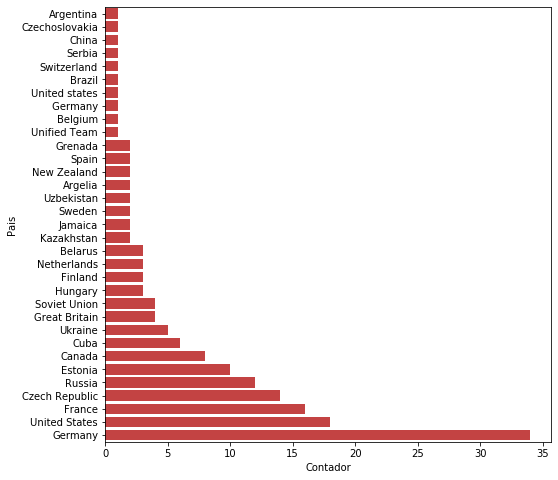

In [7]:
paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'WC'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        

imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(8,8))
sns.barplot(x = 'Contador', y= 'Pais', data = imp,color='#D82E2E', order=imp.sort_values('Contador').Pais)
print("El número de países participantes es",len(paises))

El número de países participantes es 38


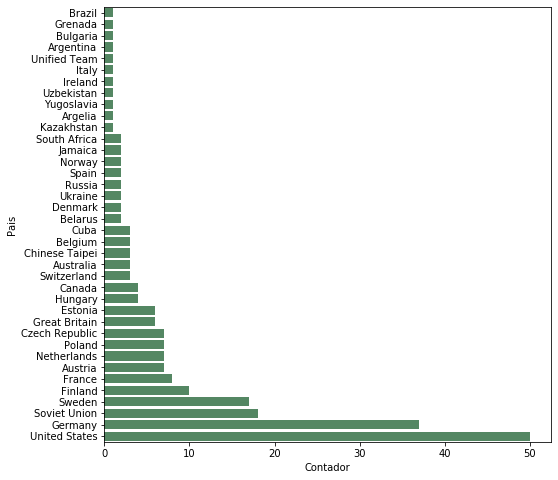

In [8]:
paises= []
contador= []
aux = 0

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Position'] <= 10 and ddbb.iloc[i]['Competition'] == 'JJOO'):
        if(ddbb.iloc[i]['Country'] not in paises):
            paises.append(ddbb.iloc[i]['Country'])
            contador.append(1)
        else:
            aux = paises.index(ddbb.iloc[i]['Country'])
            contador[aux] = contador[aux] + 1        


            
imp = pd.DataFrame({'Contador':contador,
                    'Pais':paises})

plt.figure(figsize=(8,8))
sns.barplot(x = 'Contador', y= 'Pais', data = imp,color="#4B9060", order=imp.sort_values('Contador').Pais)

print("El número de países participantes es",len(paises))

En este caso podemos observar varios datos como Estados Unidos le dá más importancia a los Juegos Olímpicos y como la mayoría de paises europeos se la dan a los munidales.
También es curioso como una de las grandes potencias en los Juegos Olímpicos como es China no tiene ningún participante entre los mejores clasificados en esta competición.

### 6.Mejores atletas en cada prueba para los diez mejores:

<Figure size 1440x1440 with 0 Axes>

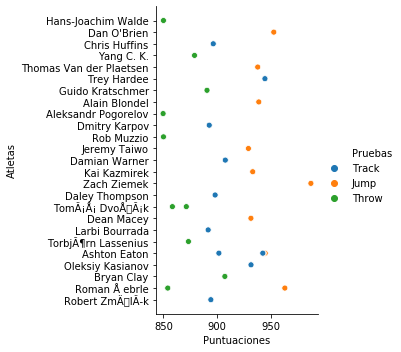

In [9]:
auxTrack = 0
auxJump = 0
auxThrow = 0

pointTrack = []
pointJump = []
pointThrow = []
athleteTrack = []
athleteJump = []
athleteThrow = []

for i in range(len(ddbb)):
    if(ddbb.iloc[i]['Competition']=='JJOO'):
        auxTrack = (ddbb.iloc[i]['100m Points']+ddbb.iloc[i]['400m Points']+ddbb.iloc[i]['110m H Points']+ddbb.iloc[i]['1500m Points'])/4
        auxJump = (ddbb.iloc[i]['Hj Points']+ddbb.iloc[i]['Pv Points']+ddbb.iloc[i]['Lj Points'])/3
        auxThrow = (ddbb.iloc[i]['Dt Points']+ddbb.iloc[i]['Sp Points']+ddbb.iloc[i]['Jt Points'])/3
        if(len(pointTrack)<=10):
            athleteTrack.append(ddbb.iloc[i])
            athleteJump.append(ddbb.iloc[i])
            athleteThrow.append(ddbb.iloc[i])
            pointTrack.append(auxTrack)
            pointJump.append(auxJump)
            pointThrow.append(auxThrow)
        else:
            if(min(pointTrack) < auxTrack):
                pointTrack[pointTrack.index(min(pointTrack))] = auxTrack
                athleteTrack[pointTrack.index(min(pointTrack))] = ddbb.iloc[i]
            if(min(pointJump) < auxJump):
                pointJump[pointJump.index(min(pointJump))] = auxJump
                athleteJump[pointJump.index(min(pointJump))] = ddbb.iloc[i]
            if(min(pointThrow) < auxThrow):
                pointThrow[pointThrow.index(min(pointThrow))] = auxThrow
                athleteThrow[pointThrow.index(min(pointThrow))] = ddbb.iloc[i]
            
atletas = []
puntuaciones = []
pruebas = []
edades = []
anios = []
posiciones = []

for i in range(10):
    atletas.append(athleteTrack[i]['Athlete'])
    puntuaciones.append(pointTrack[i])
    edades.append(athleteTrack[i]['Age'])
    anios.append(athleteTrack[i]['Year'])
    pruebas.append('Track')
    posiciones.append(athleteTrack[i]['Position'])
    atletas.append(athleteJump[i]['Athlete'])
    puntuaciones.append(pointJump[i])
    edades.append(athleteJump[i]['Age'])
    anios.append(athleteJump[i]['Year'])
    pruebas.append('Jump')
    posiciones.append(athleteJump[i]['Position'])
    atletas.append(athleteThrow[i]['Athlete'])
    puntuaciones.append(pointThrow[i])
    edades.append(athleteThrow[i]['Age'])
    anios.append(athleteThrow[i]['Year'])
    pruebas.append('Throw')
    posiciones.append(athleteThrow[i]['Position'])
    
imp = pd.DataFrame({'Pruebas':pruebas,
                    'Puntuaciones':puntuaciones,
                    'Edades':edades,
                    'Anios':anios,
                    'Atletas':atletas,
                    'Posiciones':posiciones})

#Ver que tipo de pruebas dan una mayor puntuacion
plt.figure(figsize=(20,20))
sns.relplot(x = 'Puntuaciones', y= 'Atletas', hue= 'Pruebas', data = imp)

En esta gráfica podemos observar un patrón para conocer en que tipo de pruebas los mejores atletas obtienen una puntuación mayor, podemos ver como las pruebas de salto se obtiene una mayor puntuación después encontramos las pruebas de pista y las de lanzamiento

### 7. Puntuaciones anteriores en función de la edad

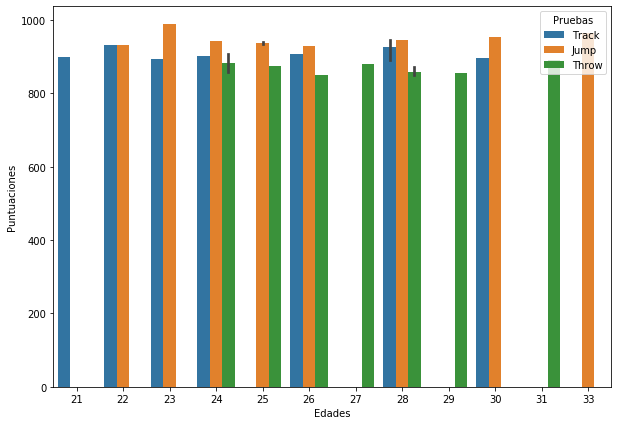

In [10]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'Edades', y= 'Puntuaciones', hue= 'Pruebas', data = imp)

Aquí tambien podemos observar como por lo general los atletas jovenes destacan en la pruebas de pista las cuales son las menos técnicas y como según va pasando el tiempo los atletas consiguen mejores resultados en las pruebas técnicas hasta los 29-30 años donde su rendimiento baja, esto también lo podemos ver en forma de line chart

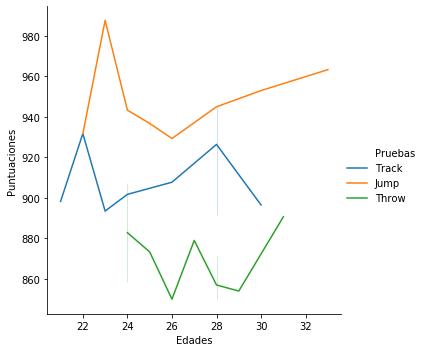

In [11]:
sns.relplot(data=imp, kind="line",x="Edades", y="Puntuaciones",hue="Pruebas")

Aquí podemos ver de forma más clara lo comentado anteriormentw como van mejorando estos datos de forma progresiva primeramente en pista, depués en salto, siendo esta en la que mejores resultados se obtienen sin duda y como las mejores puntuaciones de lanzamiento empiezan a aparecer a partir de los 24 años.

### 8.Repartición de las puntuaciones del record del mundo por cada prueba

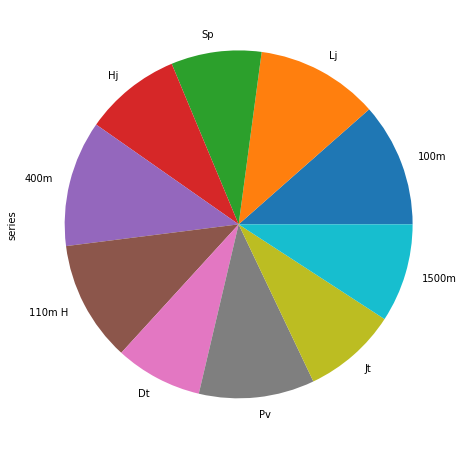

In [12]:
maxValue = ddbb['Total Points'].max()
max_index = list(ddbb['Total Points']).index(maxValue)

t = [ddbb['100m Points'].iloc[max_index],ddbb['Lj Points'].iloc[max_index],ddbb['Sp Points'].iloc[max_index],
     ddbb['Hj Points'].iloc[max_index],ddbb['400m Points'].iloc[max_index],ddbb['110m H Points'].iloc[max_index],
     ddbb['Dt Points'].iloc[max_index],ddbb['Pv Points'].iloc[max_index],ddbb['Jt Points'].iloc[max_index],
     ddbb['1500m Points'].iloc[max_index]]

series = pd.Series(t, index =['100m','Lj','Sp','Hj','400m','110m H','Dt','Pv','Jt','1500m'], name ='series') 
  
series.plot.pie(figsize =(8, 8)) 
plt.show() 

En el gráfico superior podemos ver como destacan principalmente tres pruebas Longitud, 100m y 400m por lo que según lo que nos dice el gráfico del mejor decatleta de la historia podriamos decir que son las pruebas en las que más destacó.

### 9.PCA
Para conocer cuales son las pruebas más importantes del decathlon voy a usar el algortimo PCA que se basa en la reducción de la dimensionalidad del problema para conocer cuales son las variables que tienen una mayor variación entre sí, en nuestro caso se podría decir que se correspondería con las pruebas que hay una mayor variación entre los mejores atletas y el resto de ellos.

Para ello voy a usar tres componentes de este algoritmo, con una componente podríamos obtener una información que no se corresponde con las más representivas por ello se aplican las otras dos componentes, pero hay que tener cuidado con el sobre entrenamiento lo que podría implicar que obtengamos información que no se corresponda con el resto de componentes.

Se cogen los datos a partir de 1980 para que el espectro que cubre de JJOO y mundiales sea el mismo ya que los JJOO comenzaron en 1912 y los mundiales en 1984

In [13]:
#Filtrado de los datos de JJOO hasta 1980
ddbbData = ddbb.copy()
prueba = []

for i in range(len(ddbbData)):
    if(ddbbData.iloc[i]['Year'] < 1980):
        prueba.append(i)
    
ddbbData.drop(prueba,inplace=True)

ddbbData = ddbbData[['100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points','400m Points','400m',
                    '110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]

#Algoritmo de PCA
pca = PCA(n_components=3)
new = pca.fit_transform(ddbbData)

print("Datos de la primera componente")
print("------------------------------")
print(abs(pca.components_[0]),"\n")

print("Datos de la segunda componente")
print("------------------------------")
print(abs(pca.components_[1]),"\n")

print("Datos de la tercera componente")
print("------------------------------")
print(abs(pca.components_[2]),"\n")

Datos de la primera componente
------------------------------
[4.59666422e-05 1.02958050e-02 7.92304151e-02 2.58326428e-02
 1.58044787e-01 1.00170939e-02 2.22372467e-02 1.61725885e-02
 1.01467699e-01 8.60193851e-02 2.80488333e-04 3.28668181e-02
 7.23489110e-01 2.52980214e-03 7.20323502e-04 1.43783026e-01
 6.34700821e-01 1.16528999e-02 3.49198339e-02 4.69515466e-03] 

Datos de la segunda componente
------------------------------
[5.13201322e-04 1.13127968e-01 9.59754825e-03 3.25709206e-01
 2.02479628e-02 1.64062201e-01 2.61631211e-03 1.35410741e-01
 9.64655966e-02 7.62579529e-03 1.24075674e-03 1.69139012e-01
 1.37096748e-01 1.53857236e-01 3.07614677e-03 8.48031922e-01
 8.04254316e-02 1.49436401e-01 8.29913359e-02 7.64003360e-03] 

Datos de la tercera componente
------------------------------
[2.51550978e-04 5.58587231e-02 6.55539042e-03 8.84951385e-01
 1.15060705e-02 3.07417416e-03 1.64358099e-03 2.07223568e-02
 6.40799260e-02 5.12667721e-03 3.92680335e-04 2.20426026e-01
 6.62584782e-02

Estos son los resultados que se obtienen después de aplicar el algoritmo de PCA para poder observar los resultados de la forma óptima utilizaremos Seaborn y con ello podremos identificar con facilidad cuales son las pruebas más relevantes para este deporte según este algoritmo.

Text(0.5, 1.0, 'PC3-> +1980')

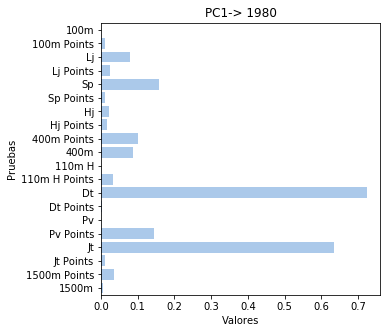

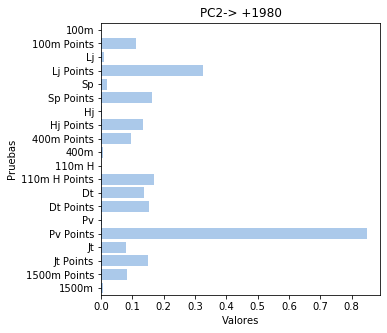

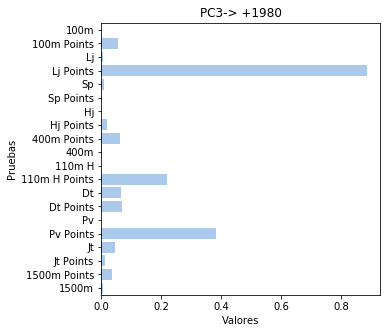

In [14]:
imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[0])})

plt.figure(figsize=(5,5))
sns.set_color_codes('pastel')
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC1-> 1980')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[1])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC2-> +1980')

imp = pd.DataFrame({'Pruebas': ddbbData.columns, 'Valores': abs(pca.components_[2])})

plt.figure(figsize=(5,5))
sns.barplot(x = 'Valores', y = 'Pruebas', data = imp, color = 'b').set_title('PC3-> +1980')

Podemos ver como según el algoritmo del PCA las pruebas con mayor son Lanzamiento de Disco, Javalina, Longitud y pértiga.

Esto puede resultar interesante ya que si se entrenan estas pruebas son en la que más diferencia se pueden sacar respecto al resto de atletas.

In [15]:
pca.explained_variance_ratio_

array([0.46709441, 0.15328652, 0.08666263])

### 10.Algoritmos de predicción

In [16]:
def metricasAlgorithms(y_test, y_pred):
    metricas = []
    metricas.append(accuracy_score(y_test, y_pred))
    
    return metricas

In [17]:
def ejecutaAlgoritmosMachineLearning(X_train, X_test, y_train, y_test):
    RegLog = RegLogisFunction(X_train, X_test, y_train, y_test)
    ADecis = ArbolDecFunction(X_train, X_test, y_train, y_test)
    dataFrameDatos = pd.DataFrame({
                                    'Metricas': ['Accuracy'],
                                    'Regresion logistica': RegLog,
                                    'Arbol de decision': ADecis
})
    return (dataFrameDatos.loc[[0]])

##### Regresión Logística.

In [18]:
def RegLogisFunction(X_train, X_test, y_train, y_test):
    
    logreg = linear_model.LogisticRegression(random_state=0)

    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    
    return metricasAlgorithms(y_test, y_pred)

##### Arbol de decisión

In [19]:
def ArbolDecFunction(X_train, X_test, y_train, y_test):

    clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

    clf = clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    metricasAlgorithms(y_test, y_pred)
    
    return metricasAlgorithms(y_test, y_pred)

In [20]:
ddbbData = ddbb[['100m','100m Points','Lj','Lj Points','Sp','Sp Points','Hj','Hj Points','400m Points','400m',
                 '110m H','110m H Points','Dt','Dt Points','Pv','Pv Points','Jt','Jt Points','1500m Points','1500m']]
listaResults = []

X_train, X_test, y_train, y_test = train_test_split(ddbbData, ddbb['Position'], test_size=0.3)

result = ejecutaAlgoritmosMachineLearning(X_train, X_test, y_train, y_test)
listaResults.append(result)
result

Metricas  Regresion logistica  Arbol de decision
0  Accuracy              0.05098           0.078431

Para el estudio de estos dos algoritmos de machine learning he elaborado una serie de funciones que permiten automatizar el proceso en el caso que queramos añadir más algoritmos a este proceso.

En la función de metricasAlgorithms la usamos para que devuelva la precisión del algoritmo, pero se prodría aplicar también para que devuelva otras métricas como el F1 o la precisión

En la función ejecutaAlgoritmosMachineLearning introcimos los algoritmos que queremos estudiar llamando a sus respectivas funciones e introducimos los nombres de las métricas que queremos estudiar.

Para crear los datasets de entrenamiento y de test usamos el 70% de los datos como entrenamiento y el 30% de test.

Como vemos en la tabla final el accuracy para esta ejecución de los algoritmos es superior la del algoritmo de árbol de decisión. Pero podemos ejecutarlo en más ocasiones y obtener diferentes resultados.

Estos algoritmos nos permiten hacer predicciones para futuras competiciones en función de los resultados obtenidos en el último año, por ejemplo para los Juegos Olímpicos de 2021.